# This Jupyter notebook compares results from MPEC and Optimal Solution.

### Here we campare Social Welfare as system objective functions 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import os

### MPEC Objective Functions


In [8]:
# Model_obj_vlues_1_20221021-185407.csv
print("Loading results from:")
files_path = os.path.realpath(os.path.join(os.path.abspath(''), "Model_CSV"))
print("\t",files_path)
files_name = 'Model_obj_vlues_'
append_name ="_20221021-185407"
ncda = 9

data = []
for j in range(1,ncda+1):
    path = os.path.join(files_path,files_name+str(j)+append_name+'.csv')
    #print("Reading file {} : {}".format(j,path))
    data.append(pd.read_csv(path, header=None))

Loading results from:
	 D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\MatlabCode\V06\ResultsAnalysis\Model_CSV


In [20]:
# Add value for Iteration 2 of each MPEC as the value for each MPEC
MPEC_OBJ = []
for df in data:
    MPEC_OBJ.append(df[df.index==1].values.flatten().tolist())

df_mpec = pd.DataFrame(MPEC_OBJ, columns = [x for x in range(24)])

time_dict = dict(list(enumerate([x for x in range(16,40)])))
df_mpec.rename(columns=time_dict, inplace=True)

df_mpec['DA']=['DA'+str(x) for x in range(1,ncda+1) ]
df_mpec['Model'] ='MPEC'

In [21]:
def change_time(df):
    for x in range(16,40):
        if x >=24:
            index = df[df['Time'] == x].index
            df.loc[index,'Time'] = df.Time[index]%24
    return df

In [28]:
df_mpec

,16,17,18,19,20,21,22,23,24,25,...,32,33,34,35,36,37,38,39,DA,Model
0,3.119215,17.808072,15.017645,65.392240,-2.773637e+01,15.330850,-39.073120,37.459690,66.418510,51.81403,...,26.142724,2.767669,0.152459,0.088302,0.819279,0.383258,0.018138,-1.387779e-17,DA1,MPEC
1,2.482111,15.072014,11.614715,60.537010,6.153445e+00,0.525850,-15.555520,34.717240,32.231165,102.63157,...,16.404848,5.823796,0.036652,0.205791,0.230459,0.026416,0.031266,1.387779e-17,DA2,MPEC
2,0.128154,6.264209,10.983290,58.012474,7.181575e+00,-54.562780,6.375730,7.732270,62.144697,49.63585,...,22.751892,5.074700,5.469183,0.006407,0.863247,0.889701,-0.021001,0.000000e+00,DA3,MPEC
3,2.497316,25.871073,52.294347,61.690117,-1.163455e+02,70.936696,17.453100,58.512572,-34.535720,65.42524,...,34.055744,12.245735,2.565918,1.893370,0.574204,0.360787,0.148862,2.775558e-17,DA4,MPEC
4,0.121126,11.450087,29.088080,16.873224,-7.105427e-15,18.635040,20.631840,102.061569,7.476284,49.85029,...,8.636361,5.795502,0.325041,-0.030588,0.981290,0.605505,0.098583,-3.941659e-09,DA5,MPEC
5,0.121535,12.967283,57.514925,28.296804,-5.104275e+01,17.307164,24.447910,80.645717,10.029854,42.60994,...,29.068947,7.302692,5.404266,-0.262877,0.717443,0.398746,-0.069009,0.000000e+00,DA6,MPEC
6,8.101703,16.680037,55.587869,24.202385,-8.127268e+01,74.259600,19.377240,110.580240,16.334673,51.09334,...,41.216285,12.139790,0.262547,0.072598,0.300614,0.017828,-0.045054,6.938894e-16,DA7,MPEC
7,0.283813,17.604084,9.878345,51.819665,-1.717898e+01,20.467315,35.968738,84.227867,1.795130,42.82480,...,28.813273,10.055435,5.371959,4.996961,0.979544,1.400711,0.156438,1.296957e-02,DA8,MPEC
8,0.141652,22.125100,36.172972,21.762365,-2.426060e+01,99.753660,51.024240,26.432050,54.541260,54.71494,...,11.443470,5.030331,2.502321,0.038002,0.965698,1.210802,0.059822,1.221245e-15,DA9,MPEC


### Loading Matlab Linear code results

In [23]:
files_name = 'results_lin_comp_market_10-17-2022@20.41.xlsx'
df_lin = pd.read_excel(files_name,'Objective_Function', header=None)
df_lin.rename(columns=time_dict, inplace=True)
df_lin['Model'] = 'Optimal'
df_lin['DA'] = 'Optimal' 

In [24]:
df_lin.sum(axis=1)

C:\Users\Alireza\AppData\Local\Temp\ipykernel_69988\1975287277.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_lin.sum(axis=1)


0   -785395.089775
dtype: float64

## Comparing Optimal Social Welfare with MPECs

In [25]:
df_comp = pd.concat([df_mpec, df_lin])

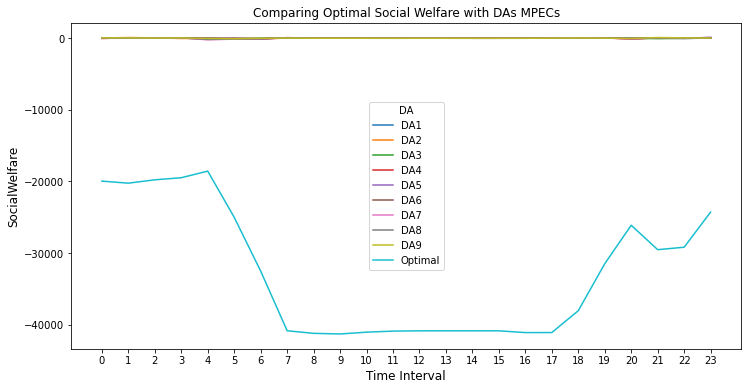

In [26]:
fig, axes = plt.subplots(1, 1, figsize=(12, 6))
df_temp = df_comp.melt( id_vars=['Model','DA'],var_name='Time', value_name='SocialWelfare')
df_temp = change_time(df_temp)
sns.lineplot(data= df_temp, x='Time', y='SocialWelfare', hue='DA')#hue='category'
axes.set(xticks=[x for x in range(24)]);
axes.set_title("Comparing Optimal Social Welfare with DAs MPECs", fontsize=12)
axes.set_xlabel('Time Interval',fontsize=12);
axes.set_ylabel('SocialWelfare',fontsize=12);

This plot clearly shows big difference between opimal result and MPECs social welfare. Maybe Using EPEC can lower down such a big gap between these two results. 

## Comparing average of MPECs with Optimal

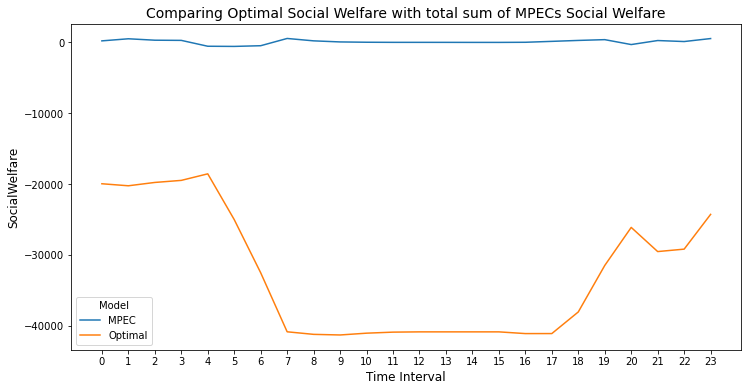

In [27]:
fig, axes = plt.subplots(1, 1, figsize=(12, 6))
df_temp = df_comp.melt( id_vars=['Model','DA'],var_name='Time', value_name='SocialWelfare').groupby(['Model','Time']).sum().reset_index()
df_temp = change_time(df_temp)
sns.lineplot(data= df_temp, x='Time', y='SocialWelfare', hue='Model')#hue='category'
axes.set(xticks=[x for x in range(24)]);
axes.set_title("Comparing Optimal Social Welfare with total sum of MPECs Social Welfare", fontsize=14)
axes.set_xlabel('Time Interval',fontsize=12);
axes.set_ylabel('SocialWelfare',fontsize=12);
fig.savefig("Optimal_vs_MPEC_Social_Welfare.png", bbox_inches='tight')